In [4]:
pip install pandas matplotlib prophet

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [18]:
import os
print(os.listdir())  # This lists all files in your current directory


['1234.ipynb', '4577.py', '5678.ipynb', 'Automating Shopping Discount System.ipynb', 'Calculator.ipynb', 'Customer Churn Predictive Analysis.ipynb', 'EDA.TensorFlow.ipynb', 'exchange rate data.ipynb', 'myenv', 'NFEM_Rates_Data_in_CSV.csv', 'University_Admission.ipynb']


In [21]:
df = pd.read_excel("C:/Users/aaliy/Documents/NFEM_Rates_Data_in_Excel (1).xlsx")


In [24]:
df.to_csv("your_file.csv", index=False)  # Saves without the row index


In [27]:
print (df.columns)

Index(['closingrate', 'ratedate', 'highestrate', 'lowestrate',
       'weightedAvgRate', 'simpleAvgRate'],
      dtype='object')


In [28]:
df.rename(columns={"actual_date_column_name": "ds", "actual_exchange_rate_column_name": "y"}, inplace=True)


In [30]:
print(df.head())


   closingrate       ratedate  highestrate  lowestrate  weightedAvgRate  \
0       1609.0    May-06-2025      1609.50     1603.00        1606.6413   
1       1605.0    May-05-2025      1611.00     1601.98        1605.6284   
2       1606.0    May-02-2025      1606.50     1600.00        1602.1811   
3       1602.0  April-30-2025      1603.50     1580.00        1596.6891   
4       1602.0  April-29-2025      1602.02     1596.70        1599.7055   

   simpleAvgRate  
0      1606.7500  
1      1606.9066  
2      1602.6901  
3      1599.4955  
4      1600.0409  


In [43]:
df = pd.read_csv("your_file.csv")
df.rename(columns={"ratedate": "ds", "closingrate": "y"}, inplace=True)
df["ds"] = pd.to_datetime(df["ds"])  # Ensure dates are in correct format


In [44]:
print(df.columns)

Index(['y', 'ds', 'highestrate', 'lowestrate', 'weightedAvgRate',
       'simpleAvgRate'],
      dtype='object')


In [45]:
print(df.head())  # Display the first few rows of the DataFrame to check the data structure

        y         ds  highestrate  lowestrate  weightedAvgRate  simpleAvgRate
0  1609.0 2025-05-06      1609.50     1603.00        1606.6413      1606.7500
1  1605.0 2025-05-05      1611.00     1601.98        1605.6284      1606.9066
2  1606.0 2025-05-02      1606.50     1600.00        1602.1811      1602.6901
3  1602.0 2025-04-30      1603.50     1580.00        1596.6891      1599.4955
4  1602.0 2025-04-29      1602.02     1596.70        1599.7055      1600.0409


In [46]:
print(df.isnull().sum())  # Shows missing values per column
df.dropna(inplace=True)  # Removes rows with missing values


y                  0
ds                 0
highestrate        0
lowestrate         0
weightedAvgRate    0
simpleAvgRate      0
dtype: int64


In [51]:
print(df.duplicated().sum())

3


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
model = Prophet()
model.fit(df)


02:25:16 - cmdstanpy - INFO - Chain [1] start processing
02:25:16 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = model.make_future_dataframe(periods=30, freq='D')  # Predict for the next 30 days
forecast = model.predict(future)


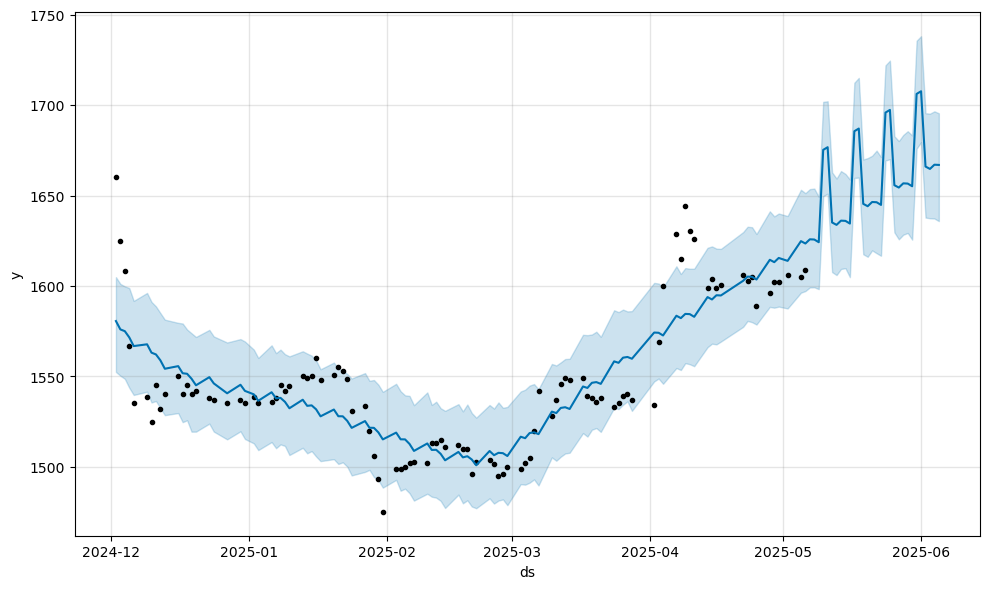

In [56]:
model.plot(forecast)
plt.show()


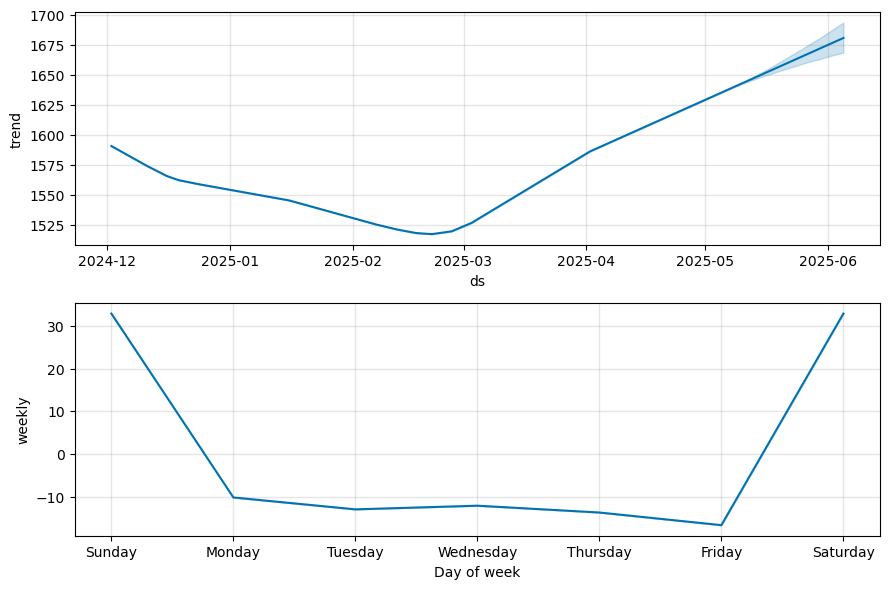

In [57]:
model.plot_components(forecast)
plt.show()


In [58]:
df['cap'] = df['y'].max()  # Set an upper limit based on historical data
df['floor'] = df['y'].min()  # Set a lower limit

# Initialize Prophet with logistic growth
model = Prophet(growth="logistic")
model.fit(df)


02:26:18 - cmdstanpy - INFO - Chain [1] start processing
02:26:18 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
model = Prophet()
model.add_seasonality(name='weekly', period=7, fourier_order=10)
model.add_seasonality(name='yearly', period=365, fourier_order=15)
model.fit(df)


02:26:43 - cmdstanpy - INFO - Chain [1] start processing
02:26:44 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
from prophet.plot import add_changepoints_to_plot

# Define holidays
holidays = pd.DataFrame({
    'ds': pd.to_datetime(['2025-01-01', '2025-12-25']),  # Example dates
    'holiday': ['New Year', 'Christmas']
})

model = Prophet(holidays=holidays)
model.fit(df)


02:27:44 - cmdstanpy - INFO - Chain [1] start processing
02:27:44 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
model = Prophet(changepoint_prior_scale=0.05)  # Default is 0.05, try lower/higher
model.fit(df)


02:28:04 - cmdstanpy - INFO - Chain [1] start processing
02:28:04 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
from sklearn.metrics import mean_squared_error

y_true = df['y'].iloc[-30:]  # Last 30 actual values
y_pred = forecast['yhat'].iloc[-30:]  # Last 30 predicted values

rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f"RMSE: {rmse}")  # Lower RMSE = better model


RMSE: 114.191893735162
